In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
# Reading in data
ds = pd.read_csv("Social_Network_Ads.csv")
X = ds.iloc[:, 2:4].values
y = ds.iloc[:,4].values

In [3]:
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [6]:
# Splitting and scaling
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# Classifier
from sklearn.naive_bayes import GaussianNB

In [9]:
X_train

array([[-1.75433414, -0.66812229],
       [-0.10692038,  2.06733027],
       [-0.59145384,  1.80818214],
       [-0.68836053,  0.48364721],
       [-1.65742744, -1.61833213],
       [ 0.66833315,  1.69300518],
       [-0.01001369, -0.32259144],
       [-0.49454715, -0.84088772],
       [-1.46361406, -1.27280128],
       [ 0.95905322,  1.34747433],
       [-1.0759873 ,  0.68520687],
       [-0.20382707, -0.35138568],
       [-1.17289399,  0.22449907],
       [ 0.57142646,  1.92335909],
       [ 0.95905322, -0.89847619],
       [ 0.37761307, -0.0634433 ],
       [-0.59145384,  1.28988586],
       [-1.85124083, -1.35918399],
       [ 1.05595991,  0.45485297],
       [ 0.95905322, -1.07124162],
       [ 0.95905322,  0.51244145],
       [ 0.47451977,  1.75059366],
       [-0.88217391,  2.18250722],
       [-0.01001369,  0.22449907],
       [ 0.37761307,  0.22449907],
       [-0.01001369,  1.14591467],
       [-0.01001369, -0.32259144],
       [-0.30073377, -0.72571077],
       [ 0.28070638,

In [10]:
X_test

array([[-0.58437475,  1.74235722],
       [-0.02870938,  1.80732207],
       [-0.95481834,  0.60547238],
       [ 0.06390152, -0.95368397],
       [ 0.15651241, -0.10914094],
       [ 1.17523227, -0.85623669],
       [-0.58437475, -0.01169367],
       [-0.39915296,  2.84675963],
       [-1.51048371,  0.7678845 ],
       [-0.49176386,  0.11823602],
       [ 0.99001048, -0.40148276],
       [ 0.80478868, -1.31099063],
       [ 0.99001048, -1.2785082 ],
       [ 1.91611944, -0.07665852],
       [-0.02870938, -0.95368397],
       [-0.58437475,  1.4500154 ],
       [ 0.71217779, -0.75878942],
       [-0.95481834,  1.80732207],
       [-0.02870938, -0.27155306],
       [ 1.45306496, -1.34347305],
       [-0.12132027, -1.2785082 ],
       [-1.23265102,  0.63795481],
       [-0.12132027,  0.31313057],
       [ 0.34173421, -0.10914094],
       [-0.49176386, -1.44092032],
       [-1.14004013, -0.23907064],
       [ 0.99001048, -0.62885973],
       [-0.67698565, -0.0441761 ],
       [-0.12132027,

In [11]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [12]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [13]:
cm

array([[63,  8],
       [ 2, 27]], dtype=int64)

In [14]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [15]:
# Plot
from matplotlib.colors import ListedColormap

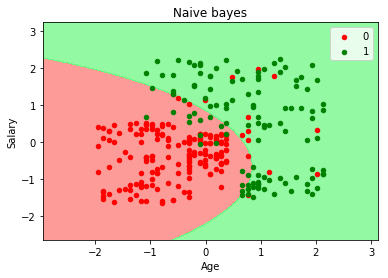

In [16]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:,0].min() - 1, 
                               X_set[:,0].max() + 1, 
                               step = 0.01),
                     np.arange(X_set[:,1].min() - 1, 
                               X_set[:,1].max() + 1, 
                               step = 0.01))
boundary = clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, boundary, alpha = 0.75, 
             cmap = ListedColormap(('#fc7a74', '#6ff785')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), 
                label = j, s = 20)
plt.title('Naive bayes')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()